# Цель лабораторной работы
Изучение библиотек обработки данных Pandas и PandaSQL.

# Задание
## Часть 1
Выполнить первое демонстрационное задание "demo assignment" под названием "Exploratory data analysis with Pandas" со страницы курса https://mlcourse.ai/assignments

## Часть 2
Выполнить следующие запросы с использованием двух различных библиотек - Pandas и PandaSQL:
* один произвольный запрос на соединение двух наборов данных
* один произвольный запрос на группировку набора данных с использованием функций агрегирования
Сравнить время выполнения каждого запроса в Pandas и PandaSQL.

# Ход работы
## Часть 1

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (sex feature) are represented in this dataset?**

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (age feature) of women?**

In [4]:
data.loc[data['sex'] == 'Female', 'age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (native-country feature)?**

In [5]:
float((data['native-country'] == 'Germany').sum()) / data.shape[0]

0.004207487485028101

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?**

In [6]:
ages1 = data.loc[data['salary'] == '>50K', 'age']
ages2 = data.loc[data['salary'] == '<=50K', 'age']
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))

The average age of the rich: 44.0 +- 10.5 years, poor - 37.0 +- 14.0 years.


**6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)**|

In [7]:
data.loc[data['salary'] == '>50K', 'education'].unique() # No

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

**7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.**

In [8]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [9]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].isin(['Never-married', 
                                   'Separated', 
                                   'Divorced',
                                   'Widowed'])), 'salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

In [10]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].str.startswith('Married')), 'salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [11]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

**9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [12]:
max_load = data['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = data[data['hours-per-week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(data[(data['hours-per-week'] == max_load)
                 & (data['salary'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29%


**10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?**

In [13]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [14]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


## Часть 2

In [15]:
import time
import pandasql as ps

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

def count_mean_time(func, params, N=5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [16]:
user_usage = pd.read_csv('data/user_usage.csv')
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [17]:
user_device = pd.read_csv('data/user_device.csv')
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [18]:
android_devices = pd.read_csv('data/android_devices.csv')
android_devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [19]:
def pandas_join(user_usage, user_device, android_devices):
    result = pd.merge(user_usage,
                     user_device[['use_id', 'platform', 'device']],
                     on='use_id',
                     how='left')
    result = pd.merge(result, 
                      android_devices.rename(columns={"Retail Branding": "manufacturer"})[['manufacturer', 'Model']],
                      left_on='device',
                      right_on='Model',
                      how='left')
    return result
pd_result = pandas_join(user_usage, user_device, android_devices)
pd_result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [20]:
def pandasql_join(user_usage, user_device, android_devices):
    join_query = '''
    SELECT * FROM (
        SELECT 
            user_usage.outgoing_mins_per_month,
            user_usage.outgoing_sms_per_month,
            user_usage.monthly_mb,
            user_device.use_id, 
            user_device.platform,
            user_device.device
        FROM user_usage LEFT JOIN user_device ON (user_usage.use_id = user_device.use_id)
        )
     as l LEFT JOIN 
         (
             SELECT `Retail Branding` as manufacturer, Model FROM android_devices
         ) as r
    ON (l.device = r.Model)
    '''
    return ps.sqldf(join_query, locals())
pdsql_result = pandasql_join(user_usage, user_device, android_devices)
pdsql_result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787.0,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788.0,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789.0,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790.0,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792.0,android,SM-G361F,Samsung,SM-G361F


In [21]:
pd_group = pd_result.groupby("manufacturer").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
        "monthly_mb": "mean",
        "use_id": "count"
    })

In [22]:
def pandasql_group(pdsql_result):
    join_query = '''
    SELECT
        manufacturer,
        AVG(outgoing_mins_per_month) as outgoing_mins_per_month,
        AVG(outgoing_sms_per_month) as outgoing_sms_per_month,
        AVG(monthly_mb) as monthly_mb,
        COUNT(use_id) as use_id
    FROM pdsql_result GROUP BY manufacturer
    '''
    return ps.sqldf(join_query, locals())
pdsql_group = pandasql_group(pdsql_result)
pdsql_group.head()

,manufacturer,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,None,400.681319,119.905495,2598.123077,10
1,HTC,299.842955,93.059318,5144.077955,44
2,Huawei,81.526667,9.500000,1561.226667,3
3,LGE,111.530000,12.760000,1557.330000,2
4,Lava,60.650000,261.900000,12458.670000,2


In [23]:
user_usage.shape, user_device.shape, android_devices.shape

((240, 4), (272, 6), (14546, 4))

In [28]:
times = []
for users_count in range(240):
    usage = user_usage[:users_count]
    user_device_sample = user_device[user_device.use_id.isin(usage.use_id)]
    android_devices_sample = android_devices[android_devices.Model.isin(user_device_sample.device)]
    count = android_devices_sample.shape[0]
    pandasql_time = count_mean_time(pandasql_join, [user_usage, user_device, android_devices])
    pandas_time = count_mean_time(pandas_join, [user_usage, user_device, android_devices])
    times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [29]:
times_df = pd.DataFrame(times).set_index('count')

In [30]:
diff = times_df.agg({
        "pandasql_time": "mean",
        "pandas_time": "mean"
    })
if diff[0] > diff[1]:
    print(f'Pandas на {diff[0] / diff[1] * 100 - 100:.2f}% быстрее Pandasql')
elif diff[0] == diff[1]:
    print(f'Pandasql на {diff[1] / diff[0] * 100 - 100:.2f}% быстрее Pandas')
else:
    print(f'Pandas и Pandasql одинаковые по производительности')

Pandas на 21.43% быстрее Pandasql


Text(0, 0.5, 'time, seconds')

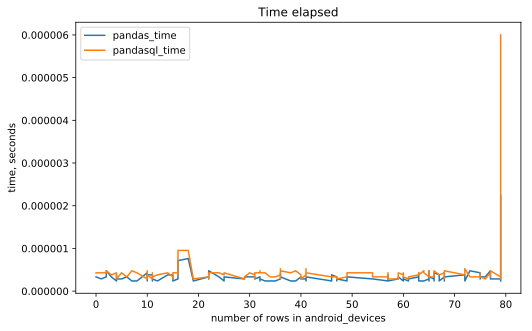

In [31]:
ax = times_df.plot(title = 'Time elapsed')
ax.set_xlabel('number of rows in android_devices')
ax.set_ylabel('time, seconds')